# Computing Connection Matrices via Fibrations

```
MIT LICENSE 2016
Shaun Harker, 2016-12-03
```

## Importing dependencies

We import dependencies. Later these will all be obtained from a single import.

In [1]:
from Braids import *
from ConleyMorseFibration import *
from ConnectionFibration import *

## Defining a Braid Diagram

We define a braid diagram by giving the data for $n$ strands on $m+1$ data points. The last data point is only used to compare against the first data point and give a strand permutation. This mitigates the need to give the permutation explicitly, but it does stop us from being able to handle braid skeletons which share values in some places.

In [2]:
diagram = BraidDiagram([ [1,4,1,4], [2,2,2,2], [3,3,3,3], [4,1,4,1]])

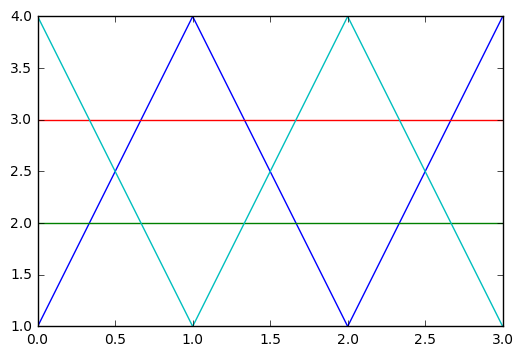

Braid Diagram

In [3]:
diagram

From the diagram we can compute a complex on which is defined a "discrete flow", which gives a directed graph on top cells with the property that down sets correspond to attracting blocks.

In [4]:
(complex, discrete_flow) = BraidComplex(diagram)

To get a map from cells to the poset of strongly connected components (i.e. a cell fibration) we invoke the following function:

In [5]:
fibration = ConleyMorseFibration(complex, discrete_flow)

We can visualize this graphically. Here each node is labelled with an integer identifier followed by the number of cells of each dimension it has:

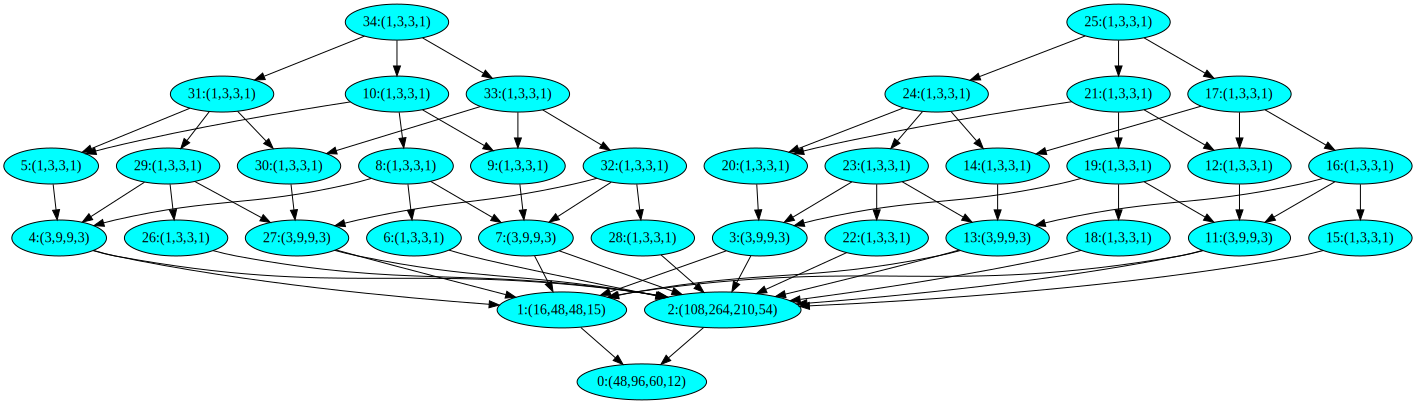

In [6]:
fibration

## Computing a connection matrix

To find the connection matrix we apply discrete Morse theory repeatedly. The routine `ConnectionFibration` does this.

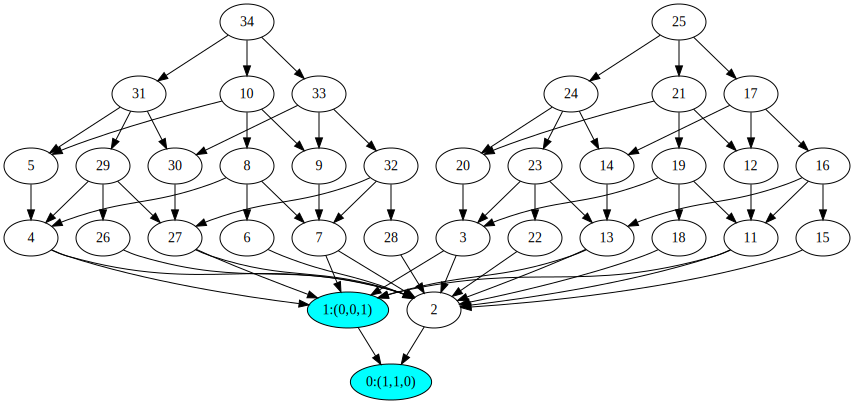

In [7]:
connection_fibration, (phi,psi) = ConnectionFibration(fibration)
connection_fibration

See above that many of the nodes are colored white and do not have population counts of how many cells they have. This is because they do not have any cells left after the discrete Morse theory. The only non-trivial nodes are colored cyan. 

## Accessing the connection matrix data

To see that what we have computed is more than a Conley-Morse graph we compute the connection matrix entries:

In [8]:
bd = lambda cell : connection_fibration.complex().boundary(cell)
C = connection_fibration.complex().cells()
print("Connection Matrix Data")
print("======================")
for d in [2,1,0]:
    print("  Boundaries of " + str(d) + "-cells in Connection Fibration:")
    print("    " + str({ c : bd(c) for c in C if c.dimension() == d}))

Connection Matrix Data
  Boundaries of 2-cells in Connection Fibration:
    {((2, 2), (1, 2), (2, 3)): (1)*[(2,3)x{3}x{2}]}
  Boundaries of 1-cells in Connection Fibration:
    {((2, 3), (3, 3), (2, 2)): 0}
  Boundaries of 0-cells in Connection Fibration:
    {((1, 1), (2, 2), (3, 3)): 0}


## Lifting the generators back to the original complex

The cells in the connection fibration correspond directly to original cells in the complex. However, we can also lift these cells back up to the original complex through the sequence of chain equivalences provided by the sequence of strict equivalencies. This corresponds to Franzosa's chain complex braid morphism.

In [9]:
print('\n\n'.join([ "psi(" + str(ElementaryChain(c)) + ") = " + str(psi(ElementaryChain(c))) for c in C]))

psi((1)*[{1}x{2}x{3}]) = (1)*[{1}x{2}x{3}]

psi((1)*[{2}x(1,2)x(2,3)]) = (1)*[(2,3)x{1}x(2,3)]+(1)*[{2}x(1,2)x(2,3)]+(1)*[(2,3)x(1,2)x{3}]+(-1)*[(2,3)x(1,2)x{2}]+(1)*[{3}x(1,2)x(2,3)]+(-1)*[{2}x(2,3)x(2,3)]+(-1)*[(2,3)x(2,3)x{2}]

psi((1)*[(2,3)x{3}x{2}]) = (1)*[(2,3)x{3}x{2}]+(1)*[{2}x{3}x(2,3)]+(-1)*[{2}x(2,3)x{3}]+(-1)*[{3}x{2}x(2,3)]+(1)*[(2,3)x{2}x{3}]+(1)*[{3}x(2,3)x{2}]


In [11]:
from CubicalVisualizer import *
original_complex_cells = [ cell for critical in C for cell in psi(ElementaryChain(critical))]

In [12]:
CubicalVisualizer(original_complex_cells)